In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
df = pd.read_csv(r'C:\Users\TRITON300SE\Desktop\Machine Learning\Ceub\Prova\Guilherme\df_limpo.csv')
df

,localizacao,area_util,quartos,suites,qntd_vagas,preco
0,BRASÍLIA - NOROESTE,238,4.0,4.0,2.0,4510049.0
1,BRASÍLIA - ASA NORTE,141,2.0,1.0,2.0,1400000.0
2,BRASÍLIA - SUDOESTE,79,2.0,2.0,1.0,1529000.0
3,BRASÍLIA - NOROESTE,85,2.0,2.0,2.0,1395000.0
4,BRASÍLIA - SUDOESTE,186,4.0,4.0,3.0,3580000.0
...,...,...,...,...,...,...
959,BRASÍLIA - ASA NORTE,175,3.0,3.0,2.0,2399000.0
960,BRASÍLIA - SUDOESTE,287,5.0,5.0,4.0,3490000.0
961,BRASÍLIA - NOROESTE,34,1.0,1.0,1.0,625000.0
962,BRASÍLIA - ASA NORTE,343,4.0,4.0,3.0,4200000.0


In [4]:
print('Aplicando One-Hot Encoding em Localização')
df_encoded = pd.get_dummies(df, columns=['localizacao'], prefix=None, dtype=float)
df_encoded

Aplicando One-Hot Encoding em Localização


,area_util,quartos,suites,qntd_vagas,preco,localizacao_BRASÍLIA - ASA NORTE,localizacao_BRASÍLIA - ASA SUL,localizacao_BRASÍLIA - JARDIM BOTANICO,localizacao_BRASÍLIA - JARDINS MANGUEIRAL,localizacao_BRASÍLIA - LAGO NORTE,localizacao_BRASÍLIA - NOROESTE,localizacao_BRASÍLIA - OCTOGONAL,localizacao_BRASÍLIA - PARK SUL,localizacao_BRASÍLIA - SUDOESTE
0,238,4.0,4.0,2.0,4510049.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,141,2.0,1.0,2.0,1400000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79,2.0,2.0,1.0,1529000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,85,2.0,2.0,2.0,1395000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,186,4.0,4.0,3.0,3580000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,175,3.0,3.0,2.0,2399000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,287,5.0,5.0,4.0,3490000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
961,34,1.0,1.0,1.0,625000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
962,343,4.0,4.0,3.0,4200000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


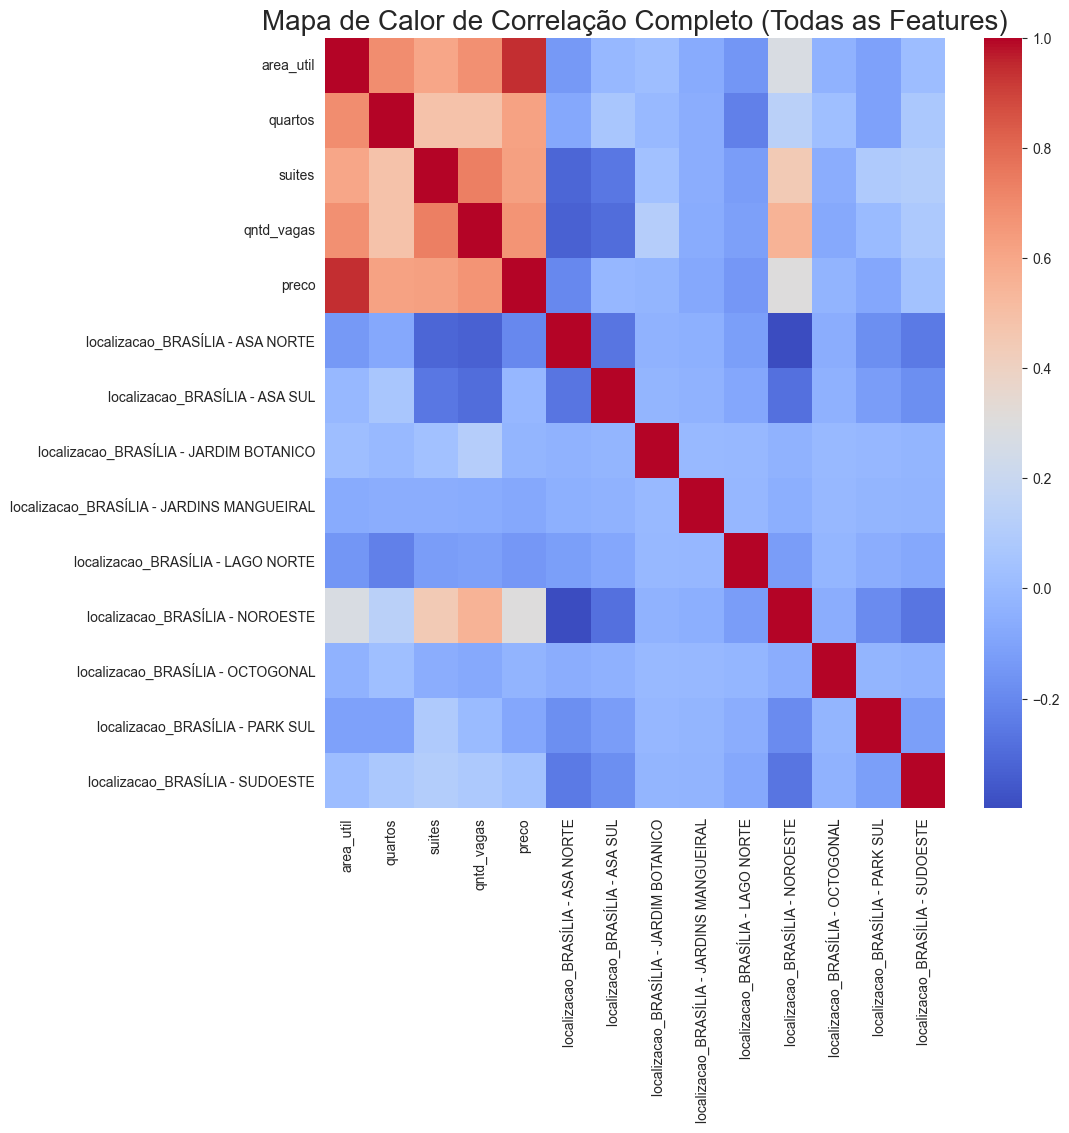

In [5]:
correlation_matrix = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação Completo (Todas as Features)', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [6]:
target = ['preco']
features = ['area_util', 'qntd_vagas']

y = df_encoded[target]
X = df_encoded[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Erro Absoluto Médio (MAE): R$ 347,323.59
Coeficiente de Determinação (R²): 0.8679


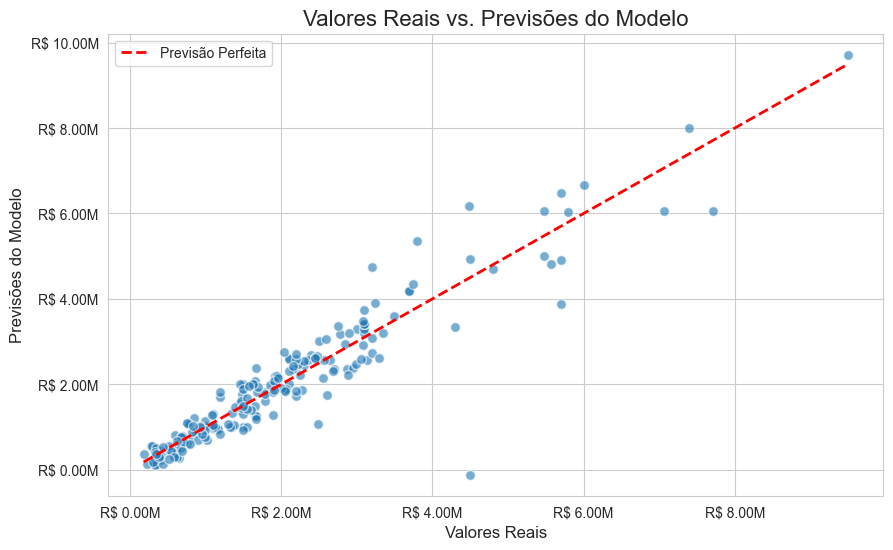

In [7]:
print(f"Erro Absoluto Médio (MAE): R$ {mae:,.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Previsão Perfeita')
plt.xlabel("Valores Reais", fontsize=12)
plt.ylabel("Previsões do Modelo", fontsize=12)
plt.title("Valores Reais vs. Previsões do Modelo", fontsize=16)

from matplotlib.ticker import FuncFormatter
def formatar_milhoes(val, pos):
    return f'R$ {val/1e6:.2f}M'
formatter = FuncFormatter(formatar_milhoes)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.show()